In [1]:
# !pip install networkx

# Binomial models

First we import the `binomial_models` module from `quantlib.options.valuation`.

In [2]:
import sys
sys.path.append('../src/')

In [3]:
%load_ext autoreload
%autoreload 1

# Import requiered modules
from quantlib.options.valuation import *
from quantlib.options import *

This module contains the `BinomialModel` class that provides methods to value options with binomial trees. Let's see an example of how to use it.

First we need to create an `OptionContract` object with the information of the contract we want to value. In this case we will value a Call option os we use the `CallOption` contract and spesify the current price ($S_0$, `underlying_price`), the strike price ($K$, `strike_price`) and the maturity ($T$, `maturity`) of the option.

In [4]:
%autoreload
# Create an option contract object
option = CallOption(
    underlying_price = 150, # S_0
    strike_price = 115, # K
    maturity = 1 # 1
)

These object contains the payoff function of a Call option under the method `payoff`. All the objects that inherit from the class `OptionContract` will have their payoff under that method.

In [5]:
print(f'The payoff for S_T = 120 is {option.payoff(120)}')
print(f'The payoff for S_T = 110 is {option.payoff(110)}')

The payoff for S_T = 120 is 5
The payoff for S_T = 110 is 0


Now we create the `BinomialModel` object by passing:
 - `option_contract`: OptionContract
    An OptionContract object with a payoff function implemented.
 - `up_factor`: float
   The up factor $u$ for the binomial model
 - `down_factor`: float
   The down factor $u$ for the binomial model
 - `time_delta`: float
   The time delta for the model.
 - `risk_free_rate`: float
   The risk free rate.

In [6]:
%autoreload

T = option.maturity
dt = 0.1
sigma = 0.2
rf = 0.02
u = np.exp(sigma * np.sqrt(dt / T))
d = 1 / u
r = np.exp(rf * dt / T) - 1

b_tree = BinomialModel(
    option_contract = option, #Option contract object
    up_factor = u, # The BS approximation up factor
    down_factor = d, # The BS approximation down factor
    time_delta = dt, # The time delta
    risk_free_rate = np.exp(rf * dt / T) - 1 # Risk free rate
)

The obects of type `BinomialModel` have an instance of a visualizer object that is in charge of rendering graphs pf the model. This instance is under the attribute `visualizer`. You can plot the binomial tree:

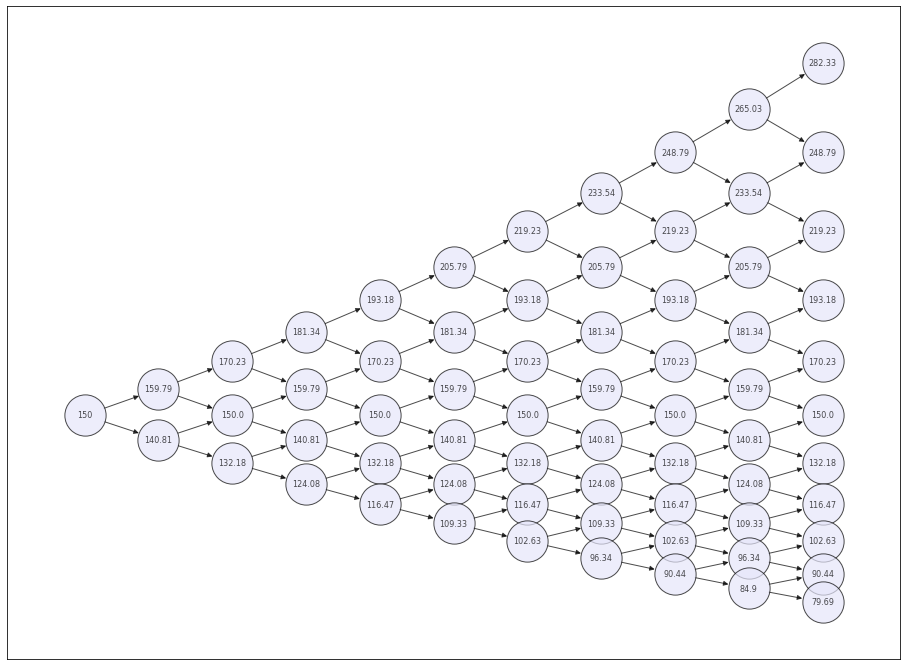

In [7]:
b_tree.visualizer.plot_price_tree()

Since the `BinomialModel` class is a valuation model (`ValuationModel`) you can value the underlying option with the method `value`. In this case, we solve the model by replicating the payoff of the option with the underlying and with the risk free asset, i.e., we set the value of the option equal to the value of the syntethic option.

In [8]:
print(f'The vaue of the option with the synthetic portfolio is: {b_tree.value()}')

The vaue of the option with the synthetic portfolio is: 38.07864283651631


If you want to visualize the $\Delta$ of the option in each node, you can use the visualizer:

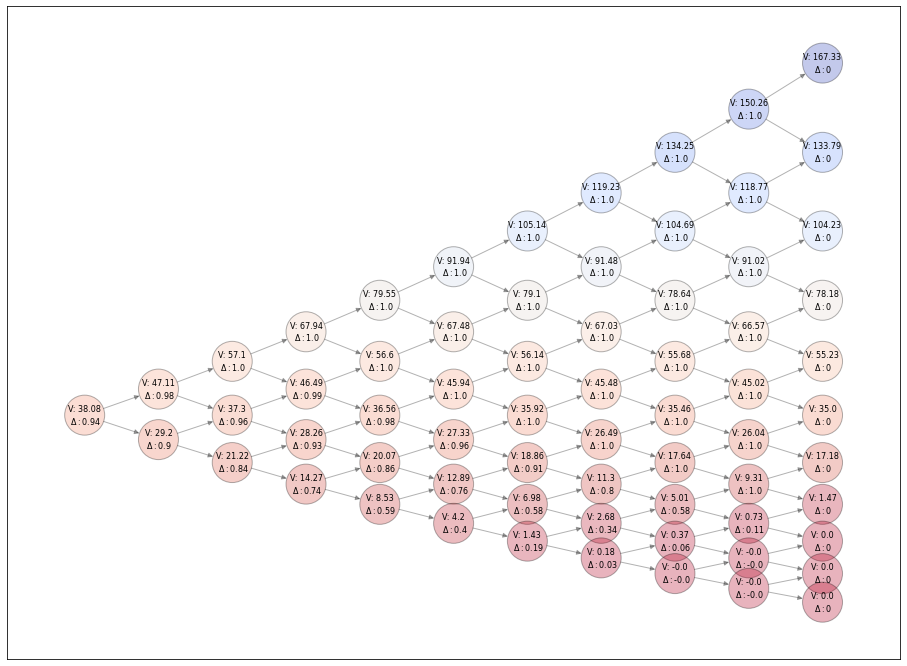

In [9]:
b_tree.visualizer.plot_val_tree()

From a specific tree:

In [10]:
# Create a tree:
g = nx.DiGraph()
g.add_node('0', price=20)
g.add_node('01', price=26)
g.add_node('00', price=17)
g.add_node('011', price=32)
g.add_node('010', price=23)
g.add_node('000', price=15)
g.add_node('001', price=22)

for n in g.nodes():
    g.nodes[n]["period"] = len(n) - 1
    g.nodes[n]["ups"] = sum(int(i) for i in n)
    if len(n)<3:
        g.add_edge(n, f'{n}1')
        g.add_edge(n, f'{n}0')

In [11]:
%autoreload
def payoff_function(underlying_price, strike_price):
    return max(2 * underlying_price - strike_price, 0)

option = ExoticOption(
    underlying_price=20,
    strike_price=34,
    maturity=2,
    payoff_function=payoff_function)

In [12]:
b_tree = BinomialModel.from_tree(
    price_tree = g,
    option_contract = option,
    risk_free_rate=0.025)

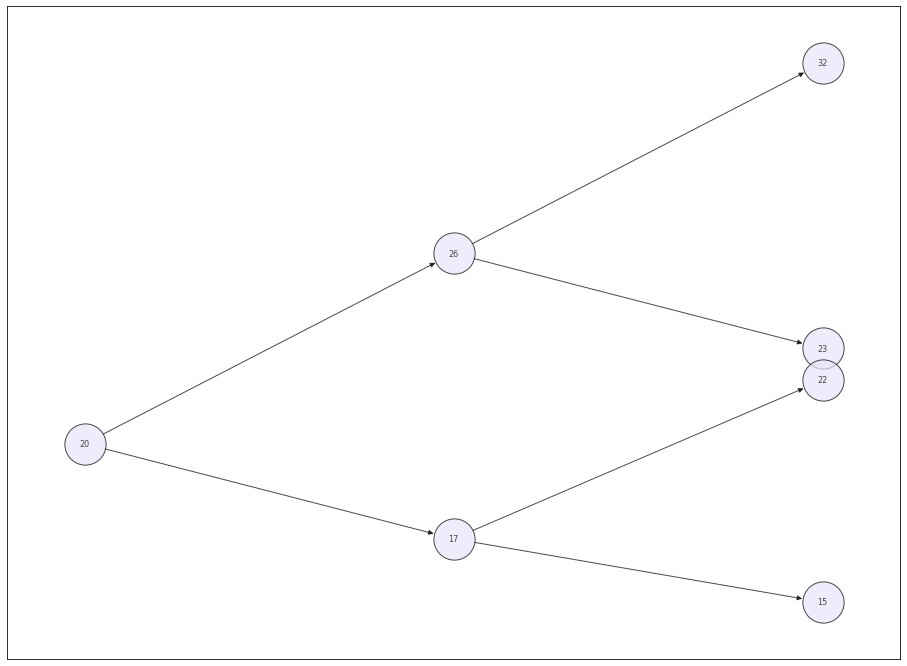

In [13]:
b_tree.visualizer.plot_price_tree()

In [14]:
b_tree.value()

9.158947338602307

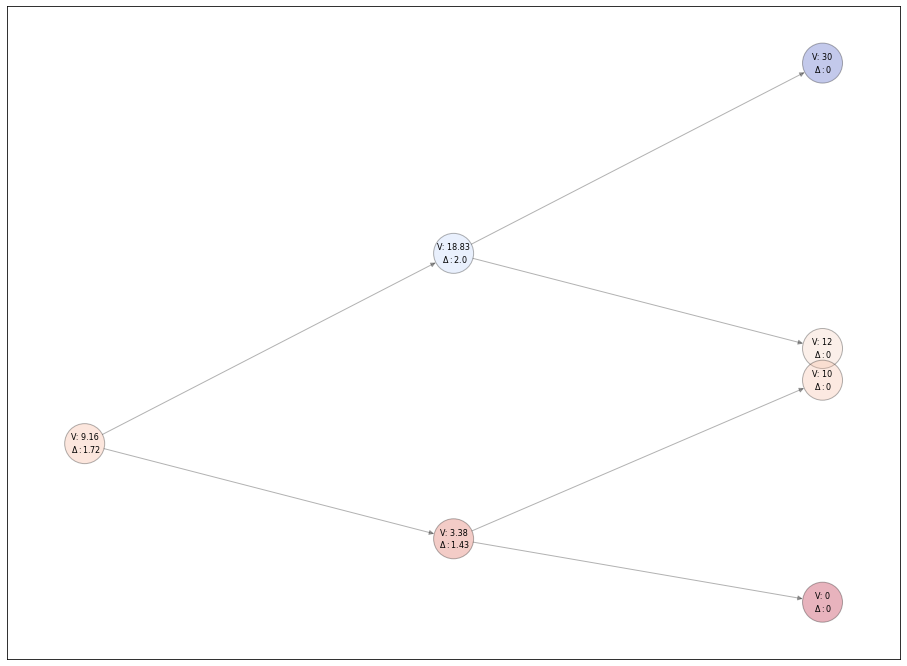

In [15]:
b_tree.visualizer.plot_val_tree()